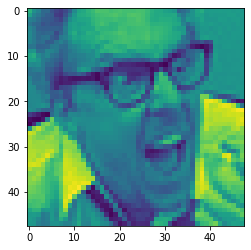

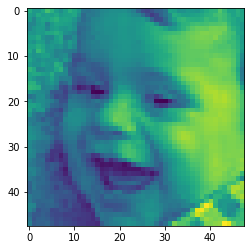

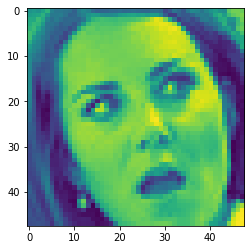

In [10]:
#import libraries needed for data visualization 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.preprocessing import image
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
import matplotlib
from sklearn.metrics import confusion_matrix, classification_report


img = mpimg.imread("Files/content/kaggle/train/angry/Training_3908.jpg")
imgplot = plt.imshow(img)
plt.show()


img = mpimg.imread("Files/content/kaggle/train/happy/Training_10070997.jpg")
imgplot = plt.imshow(img)
plt.show()

img = mpimg.imread("Files/content/kaggle/train/surprise/Training_10060820.jpg")
imgplot = plt.imshow(img)
plt.show()


In [11]:
train_dir = 'Files/content/kaggle/train'
val_dir = 'Files/content/kaggle/validation'
test_dir = 'Files/content/kaggle/test'


train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen=ImageDataGenerator(rescale=1./255)

#generate ur training, validation and testing dataset
training_set = train_datagen.flow_from_directory(
        train_dir,
        target_size=(48, 48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

val_set = val_datagen.flow_from_directory(
        val_dir,
        target_size=(48, 48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

test_set=val_datagen.flow_from_directory(
        test_dir,
        target_size=(48, 48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical',
        shuffle=False)

Found 19647 images belonging to 5 classes.
Found 2435 images belonging to 5 classes.
Found 2486 images belonging to 5 classes.


In [12]:
# import needed for data summary
import glob
import os
import pandas as pd
from pandas import DataFrame

path = r'Files\content\kaggle'            

#we shall store all the file names in this list
filelist = []

for root, dirs, files in os.walk(path):
  for file in files:
    if file.endswith('.jpg'):
      filelist.append(os.path.join(root,file))
  
df_files = DataFrame (filelist,columns=['fila_path'])
print(df_files)

                                               fila_path
0      Files\content\kaggle\test\angry\PublicTest_101...
1      Files\content\kaggle\test\angry\PublicTest_108...
2      Files\content\kaggle\test\angry\PublicTest_115...
3      Files\content\kaggle\test\angry\PublicTest_118...
4      Files\content\kaggle\test\angry\PublicTest_122...
...                                                  ...
24563  Files\content\kaggle\validation\surprise\Priva...
24564  Files\content\kaggle\validation\surprise\Priva...
24565  Files\content\kaggle\validation\surprise\Priva...
24566  Files\content\kaggle\validation\surprise\Priva...
24567  Files\content\kaggle\validation\surprise\Priva...

[24568 rows x 1 columns]


In [13]:
df_data = df_files["fila_path"].str.split("\\", n = 6, expand = True)
print(df_data)
print(len(df_data))
for i in range(len(df_data)):
    df_data[0][i]=df_data[0][i].replace("Files","")
col = ['index','Content1','Path','Folder','Category','FileName']
print(col)
print(df_data)
print(df_data.columns)
df_data.columns=col
df_data=df_data[['Folder','Category']]

           0        1       2           3         4                         5
0      Files  content  kaggle        test     angry   PublicTest_10116449.jpg
1      Files  content  kaggle        test     angry   PublicTest_10813312.jpg
2      Files  content  kaggle        test     angry   PublicTest_11521746.jpg
3      Files  content  kaggle        test     angry   PublicTest_11832974.jpg
4      Files  content  kaggle        test     angry   PublicTest_12296139.jpg
...      ...      ...     ...         ...       ...                       ...
24563  Files  content  kaggle  validation  surprise  PrivateTest_99454564.jpg
24564  Files  content  kaggle  validation  surprise  PrivateTest_99502303.jpg
24565  Files  content  kaggle  validation  surprise  PrivateTest_99696795.jpg
24566  Files  content  kaggle  validation  surprise  PrivateTest_99709238.jpg
24567  Files  content  kaggle  validation  surprise  PrivateTest_99719047.jpg

[24568 rows x 6 columns]
24568
['index', 'Content1', 'Path', 'F

In [14]:
df_data.groupby(["Folder"]).count()

,Category
Folder,
test,2486
train,19647
validation,2435


In [15]:
df_data.groupby(["Folder", "Category"]).size()

Folder      Category
test        angry        467
            disgust       56
            happy        895
            sad          653
            surprise     415
train       angry       3995
            disgust      436
            happy       7215
            sad         4830
            surprise    3171
validation  angry        491
            disgust       55
            happy        879
            sad          594
            surprise     416
dtype: int64

In [30]:
#import required libraries
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.optimizers import Adam

In [33]:
emotion_model.compile(loss='categorical_crossentropy',optimizer=Adam(learning_rate=0.0001),metrics=['accuracy'])

emotion_model_info = emotion_model.fit(
        training_set,
        epochs=25,
        validation_data=val_set)

Epoch 1/25
307/307 [==============================] - 362s 1s/step - loss: 1.3441 - accuracy: 0.4162 - val_loss: 1.2396 - val_accuracy: 0.4916
Epoch 2/25
307/307 [==============================] - 182s 593ms/step - loss: 1.1629 - accuracy: 0.5232 - val_loss: 1.1052 - val_accuracy: 0.5487
Epoch 3/25
307/307 [==============================] - 181s 590ms/step - loss: 1.0828 - accuracy: 0.5630 - val_loss: 1.0499 - val_accuracy: 0.5807
Epoch 4/25
307/307 [==============================] - 180s 585ms/step - loss: 1.0218 - accuracy: 0.5906 - val_loss: 1.0039 - val_accuracy: 0.5893
Epoch 5/25
307/307 [==============================] - 185s 604ms/step - loss: 0.9742 - accuracy: 0.6103 - val_loss: 0.9591 - val_accuracy: 0.6172
Epoch 6/25
307/307 [==============================] - 181s 588ms/step - loss: 0.9282 - accuracy: 0.6308 - val_loss: 0.9141 - val_accuracy: 0.6419
Epoch 7/25
307/307 [==============================] - 179s 583ms/step - loss: 0.8939 - accuracy: 0.6455 - val_loss: 0.9059 - va

In [31]:
# create ur CNN Model 
emotion_model = Sequential()

#adding the layers
#step 1 add ur first Conv layers
# (nbr of filter, kernel size (row,col),input shape, activation )
emotion_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))
emotion_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))

#step -2 add the Pooling layer
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))

#step -3 add drop out layer
emotion_model.add(Dropout(0.25))

emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))

emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))

#step -4 when you are satified with your feature extractor add Flattening layer.
emotion_model.add(Flatten())

#step -5 add ur Fully connected layers
emotion_model.add(Dense(1024, activation='relu',))
emotion_model.add(Dropout(0.25))
emotion_model.add(Dense(5, activation='softmax'))

#now let's see a summary of our model
emotion_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 46, 46, 32)        320       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 44, 44, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 22, 22, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 22, 22, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 20, 20, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 10, 10, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 8, 8, 128)        

In [38]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

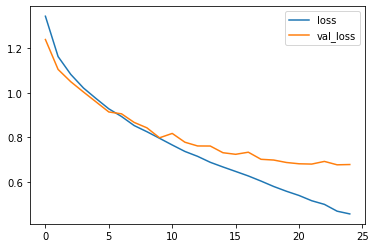

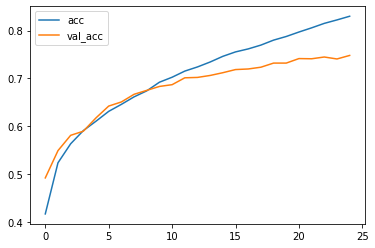

In [39]:
# Loss vs Val Loss
loss = emotion_model_info.history['loss']
val_loss = emotion_model_info.history['val_loss']
plt.plot(loss)
plt.plot(val_loss)
plt.legend(['loss', 'val_loss'])
plt.show()

#Accuracy vs Val accuracy
loss = emotion_model_info.history['accuracy']
val_loss = emotion_model_info.history['val_accuracy']
plt.plot(loss)
plt.plot(val_loss)
plt.legend(['acc', 'val_acc'])
plt.show()

In [40]:
emotion_model.evaluate(test_set)

#let's get an idea about our class indices to assess our model
print(test_set.class_indices)

39/39 [==============================] - 72s 1s/step - loss: 0.7038 - accuracy: 0.7502
{'angry': 0, 'disgust': 1, 'happy': 2, 'sad': 3, 'surprise': 4}


In [41]:
# let's create a function that will plot our image
def plot_image(test_image):
  img = mpimg.imread(test_image)
  imgplot = plt.imshow(img)
  plt.show()

#and a function that will outpu the predicted emotion
def predict_emotion(test_image):
  emotion=['Angry','Disgust','Happy','Sad','Surprise']
  test_image = image.load_img(test_image, target_size = (48,48),color_mode='grayscale')
  test_image = image.img_to_array(test_image)
  test_image = np.expand_dims(test_image, axis = 0)
  neural_net_output=emotion_model.predict(test_image)[0]
  print(neural_net_output)
  neural_net_output=neural_net_output.tolist()
  print(emotion [neural_net_output.index(max(neural_net_output))])

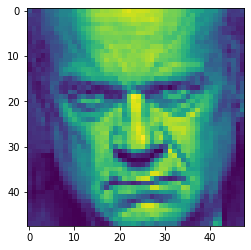

[1.0000000e+00 0.0000000e+00 0.0000000e+00 1.5773632e-20 0.0000000e+00]
Angry


In [42]:
#let's choose an image of an angry candidate. what would the neural network predict?
test_image='Files/content/kaggle/test/angry/PublicTest_10813312.jpg'
plot_image(test_image)
predict_emotion(test_image)

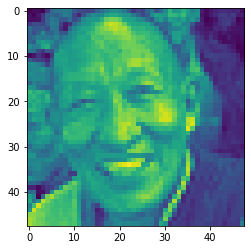

[0. 0. 1. 0. 0.]
Happy


In [44]:
#let's choose an image of a happy candidate. what would the neural network predict
test_image='Files/content/kaggle/test/happy/PublicTest_10181609.jpg'
plot_image(test_image)
predict_emotion(test_image)

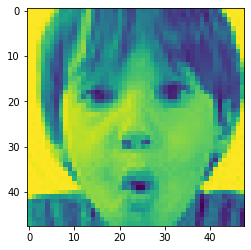

[0. 0. 0. 0. 1.]
Surprise


In [45]:
#let's choose an image of an surprised candidate dataset. what would the neural network predict
test_image='Files/content/kaggle/test/surprise/PublicTest_10709121.jpg'
plot_image(test_image)
predict_emotion(test_image)

              precision    recall  f1-score   support

       angry       0.63      0.57      0.60       467
     disgust       0.75      0.38      0.50        56
       happy       0.84      0.86      0.85       895
         sad       0.67      0.72      0.69       653
    surprise       0.81      0.81      0.81       415

    accuracy                           0.75      2486
   macro avg       0.74      0.67      0.69      2486
weighted avg       0.75      0.75      0.75      2486



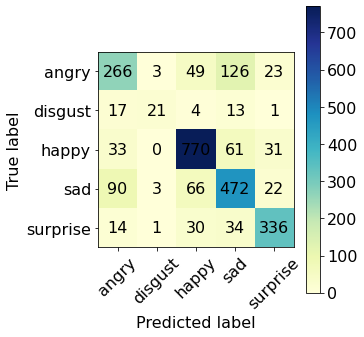

In [46]:

# prediction and true labels
y_prob = emotion_model.predict(test_set)
y_pred = np.argmax(y_prob, axis=1)
y_true = test_set.classes
labels = ['angry', 'disgust', 'happy', 'sad', 'surprise']

def plot_confusion_matrix(y_true, y_pred, cmap=plt.cm.Blues):
    cm = confusion_matrix(y_true, y_pred)
    fig = plt.figure(figsize=(5,5))
    matplotlib.rcParams.update({'font.size': 16})
    ax  = fig.add_subplot(111)
    matrix = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    fig.colorbar(matrix) 
    for i in range(0,5):
        for j in range(0,5):  
            ax.text(j,i,cm[i,j],va='center', ha='center')
    ticks = np.arange(len(labels))
    ax.set_xticks(ticks)
    ax.set_xticklabels(labels, rotation=45)
    ax.set_yticks(ticks)
    ax.set_yticklabels(labels)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
plot_confusion_matrix(y_true, y_pred, cmap=plt.cm.YlGnBu)

print(classification_report(test_set.classes, y_pred, target_names=labels))


In [61]:
# first import the libraries required for this exercise
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io
import html
import time
from image_commons import nparray_as_image, draw_with_alpha
from google.colab import output
from numpy import asarray

ModuleNotFoundError: No module named 'google.colab'

In [ ]:
print("AA")